HOla aqui estyoy

# **Ejercicio Práctico**
## Predicción de la supervivencia a bordo del Titanic

### Objetivo:

### Usar los algoritmos de clasificación supervisada para predecir si un pasajero sobrevivió o no al hundimiento del Titanic, utilizando información como edad, sexo, clase, etc:

### Modelos a usar:
- Regresión Logística
- K-Vecinos más Cercanos (KNN)
- **Máquinas de Vectores de Soporte (SVC)**

In [61]:
# Importamos librerías
import pandas as pd
import numpy as np

# Leemos el DataSet
df = pd.read_csv("C:/Users/Administrador/OneDrive/BOOTCAMP/MACHINE_LEARNING/SCIKITLEARN/DataSet_Titanic.csv", encoding="utf-8-sig")

x = df.drop(columns=["Survived"]) # Eliminamos la columna "Survived" para crear el conjunto de datos de entrada
y = df["Survived"] # Creamos el conjunto de datos de salida
df.head(10) # Mostramos las primeras 10 filas del DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,108.0,1.0,22.0,1.0,0.0,523.0,7.2500,147.0,2.0
1,2.0,1.0,1.0,190.0,0.0,38.0,1.0,0.0,596.0,71.2833,81.0,0.0
2,3.0,1.0,3.0,353.0,0.0,26.0,0.0,0.0,669.0,7.9250,147.0,2.0
3,4.0,1.0,1.0,272.0,0.0,35.0,1.0,0.0,49.0,53.1000,55.0,2.0
4,5.0,0.0,3.0,15.0,1.0,35.0,0.0,0.0,472.0,8.0500,147.0,2.0
5,6.0,0.0,3.0,554.0,1.0,28.0,0.0,0.0,275.0,8.4583,147.0,1.0
6,7.0,0.0,1.0,515.0,1.0,54.0,0.0,0.0,85.0,51.8625,129.0,2.0
7,8.0,0.0,3.0,624.0,1.0,2.0,3.0,1.0,395.0,21.0750,147.0,2.0
8,9.0,1.0,3.0,412.0,0.0,27.0,0.0,2.0,344.0,11.1333,147.0,2.0
9,10.0,1.0,2.0,576.0,0.0,14.0,1.0,0.0,132.0,30.0708,147.0,0.0


### Importamos las librerias necesarias para usar el modelo

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



### Dividimos los datos en entrenamiento y prueba:

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Estandarizamos los datos:

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Aplicación del Algoritmo:

In [65]:
algoritmo = SVC(kernel="linear", C=1.0, random_state=42)

### Entrenamiento del modelo y realizamos predicción:

In [66]:
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)

### Evaluaremos el la precisión:

In [67]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

Precisión del modelo: 78.21%


### Evaluación de la presición:

In [68]:
precision = precision_score(y_test, y_pred)
print(f"Precisión del modelo: {precision * 100:.2f}%")


Precisión del modelo: 75.36%


### Recall de los datos:
### *Métrica que mide la capacidad del modelo para identificar correctamente todas las instancias positivas.*

In [69]:
recall = recall_score(y_test, y_pred)
print(f"Recall del modelo: {recall * 100:.2f}%")

Recall del modelo: 70.27%


### Gráfica de matriz de confusión SVM:

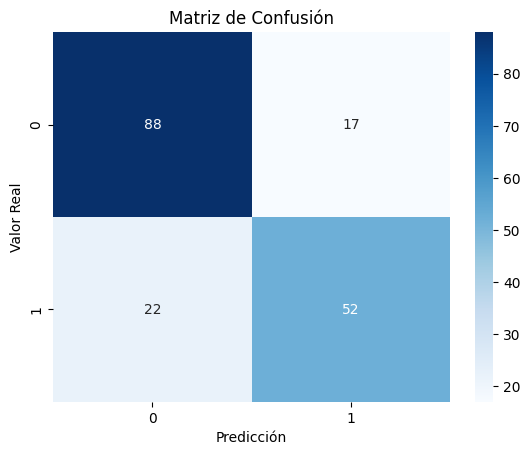

In [70]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

### *Resultado: matriz de confusión:*

- 88 (Verdaderos negativos - TN): Casos donde el modelo correctamente predijo la clase 0.
- 17 (Falsos positivos - FP): Casos donde el modelo predijo 1, pero el valor real era 0.
- 22 (Falsos negativos - FN): Casos donde el modelo predijo 0, pero el valor real era 1.
- 52 (Verdaderos positivos - TP): Casos donde el modelo correctamente predijo la clase 1.